# Capstone Part 2: Data Cleaning

This file contains all the code used to clean the data collected from the Riot API.

### Section 1 - Importing the Data and Libraries and

In this section we will:

1. Import all libraries required.

2. Import the data from the csv file into a pandas dataframe.

3. Drop non-relevant columns. A explaination for each non-relevant column can be found in 'Data Descriptions.xlsx'.

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

In [2]:
# Set pandas to show max columns and max rows
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# Import MatchData into a dataframe
match_df = pd.read_csv('MatchData.csv')
match_df.head()

,Unnamed: 0,participantId,teamId,championId,spell1Id,spell2Id,stats.participantId,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.unrealKills,stats.totalDamageDealt,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.totalDamageDealtToChampions,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.magicalDamageTaken,stats.physicalDamageTaken,stats.trueDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.champLevel,stats.visionWardsBoughtInGame,stats.sightWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.combatPlayerScore,stats.objectivePlayerScore,stats.totalPlayerScore,stats.totalScoreRank,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,timeline.participantId,timeline.creepsPerMinDeltas.10-20,timeline.creepsPerMinDeltas.0-10,timeline.xpPerMinDeltas.10-20,timeline.xpPerMinDeltas.0-10,timeline.goldPerMinDeltas.10-20,timeline.goldPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.0-10,timeline.xpDiffPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.role,timeline.lane,gameId,seasonId,gameDuration,pickTurn,Banned Champion Id,timeline.creepsPerMinDeltas.20-30,timeline.xpPerMinDeltas.20-30,timeline.goldPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.20-30,highestAchievedSeasonTier,timeline.creepsPerMinDeltas.30-end,timeline.xpPerMinDeltas.30-end,timeline.goldPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.30-end
0,0,10,200,75,4,12,10,False,2033,3024,3078,3801,1082,3111,3340,1,5,1,0,1,0,405,0,0,0,0,0,121505,60762,58411,2331,0,10832,5879,4953,0,0,0,14380,10990,6478,20,7,22286,7398,13474,1412,8334,7598,2,0,185,3,1,0,57,14,4,0,10,1,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8214,836,0,0,8226,250,844,0,8210,0,0,0,8236,14,0,0,8009,463,200,0,9105,19,0,0,8200,8000.0,5008.0,5002.0,5002.0,10,10.1,7.1,630.4,451.0,398.2,279.4,NaN,NaN,NaN,NaN,1107.1,564.6,NaN,NaN,SOLO,TOP,3239984916,13,1407,10,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7,200,75,4,12,7,True,2033,2055,3078,1082,3111,3024,3340,3,3,2,0,1,0,556,0,0,0,0,0,104366,44450,52666,7250,0,10577,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8540,6369,217,8247,6

In [4]:
# Check info
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13457 entries, 0 to 13456
Columns: 147 entries, Unnamed: 0 to timeline.damageTakenDiffPerMinDeltas.30-end
dtypes: bool(1), float64(32), int64(105), object(9)
memory usage: 15.0+ MB


In [5]:
# Creaate a Droplist some of the non-relavent features. An explaination of for these dropped features can be found in 'Data Descriptions.xlsx'.

Col_drop_list = ['Unnamed: 0', "participantId", "championId", "teamId", "stats.participantId", "stats.unrealKills", "stats.totalDamageDealt",
                 "stats.totalDamageDealtToChampions", "stats.magicalDamageTaken", "stats.magicalDamageTaken", "stats.physicalDamageTaken", 
                 "stats.trueDamageTaken", "stats.sightWardsBoughtInGame", "stats.combatPlayerScore", "stats.objectivePlayerScore",
                 "stats.totalPlayerScore", "stats.totalScoreRank", "stats.playerScore0", "stats.playerScore1", "stats.playerScore2",
                 "stats.playerScore3", "stats.playerScore4", "stats.playerScore5", "stats.playerScore6", "stats.playerScore7", "stats.playerScore8",
                 "stats.playerScore9", "stats.perk0Var1", "stats.perk0Var2", "stats.perk0Var3", "stats.perk1Var1",
                 "stats.perk1Var2", "stats.perk1Var3", "stats.perk2Var1", "stats.perk2Var2", "stats.perk2Var3",
                 "stats.perk3Var1", "stats.perk3Var2", "stats.perk3Var3", "stats.perk4Var1", "stats.perk4Var2", "stats.perk4Var3",
                 "stats.perk5Var1", "stats.perk5Var2", "stats.perk5Var3", "timeline.participantId", "timeline.creepsPerMinDeltas.10-20",
                 "timeline.creepsPerMinDeltas.0-10", "timeline.xpPerMinDeltas.10-20", "timeline.xpPerMinDeltas.0-10", "timeline.goldPerMinDeltas.10-20",
                 "timeline.goldPerMinDeltas.0-10", "timeline.csDiffPerMinDeltas.10-20", "timeline.csDiffPerMinDeltas.0-10", "timeline.xpDiffPerMinDeltas.10-20",
                 "timeline.xpDiffPerMinDeltas.0-10", "timeline.damageTakenPerMinDeltas.10-20", "timeline.damageTakenPerMinDeltas.0-10", 
                 "timeline.damageTakenDiffPerMinDeltas.10-20", "timeline.damageTakenDiffPerMinDeltas.0-10", "timeline.role", "timeline.lane", "gameId",
                 "pickTurn", "timeline.creepsPerMinDeltas.20-30", "timeline.xpPerMinDeltas.20-30", "timeline.goldPerMinDeltas.20-30",	
                 "timeline.csDiffPerMinDeltas.20-30", "timeline.xpDiffPerMinDeltas.20-30", "timeline.damageTakenPerMinDeltas.20-30", 
                 "timeline.damageTakenDiffPerMinDeltas.20-30", "highestAchievedSeasonTier",	"timeline.creepsPerMinDeltas.30-end",	
                 "timeline.xpPerMinDeltas.30-end", "timeline.goldPerMinDeltas.30-end", "timeline.csDiffPerMinDeltas.30-end", "timeline.xpDiffPerMinDeltas.30-end",
                 "timeline.damageTakenPerMinDeltas.30-end", "timeline.damageTakenDiffPerMinDeltas.30-end", "stats.champLevel"
                ]

In [6]:
# Drop Columns
match_df1 = match_df.drop(Col_drop_list, axis=1)

In [7]:
# Check to see if all the columns were dropped
match_df1.head()

,spell1Id,spell2Id,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,seasonId,gameDuration,Banned Champion Id
0,4,12,False,2033,3024,3078,3801,1082,3111,3340,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,13,1407,268
1,4,12,True,2033,2055,3078,1082,3111,3024,3340,3,3,2,0,1,0,556,0,0,0,0,44450,52666,7250,0,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8247,6733,2,0,160,4,0,0,58,2,8,4,False,False,False,False,False,True,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,13,1303,11
2,12,4,False,3052,3143,3800,3047,3025,1054,3340,4,10,4,0,1,0,484,0,0,0,0,56185,123726,6604,0,6622,10404,847,486,1,50043,10558,5830,21,23,43572,11989,13140,2,0,209,6,0,4,675,3,15,1,True,False,False,False,False,False,8010,9101,9105,8014,8347,8304,8000,8300.0,5007.0,5008.0,5002.0,13,2051,119
3,11,4,False,1401,2031,3047,2055,1033,1028,3340,0,4,0,0,0,0,397,0,0,0,0,23330,42392,6162,0,756,1869,336,3036,1,8353,5877,0,19,8,17312,4737,4450,0,0,22,75,61,0,381,2,6,0,False,False,False,False,NaN,NaN,8351,8304,8321,8347,9111,9104,8300,8000.0,5005.0,5008.0,5002.0,12,954,121
4,11,4,False,3052,1028,3800,3111,0,1401,3364,1,5,5,0,1,0,562,0,0,0,0,32376,64191,16403,0,2055,5161,1091,7117,1,21430,28540,1619,17,18,33216,8204,8150,2,0,27,95,59,11,520,3,8,2,False,False,True,False,False,False,8230,8275,8234,8232,9111,9105,8200,8000.0,5005.0,5008.0,5002.0,12,1450,74


### Section 2 - Preliminary Data Cleaning

In this section we will explore all the NaN values associated with the imported dataframe and deal will cleaning these NaN values, as well any duplicated rows.

In [8]:
# Check for NaNs
match_df1.isna().sum()

spell1Id                                    0
spell2Id                                    0
stats.win                                   0
stats.item0                                 0
stats.item1                                 0
stats.item2                                 0
stats.item3                                 0
stats.item4                                 0
stats.item5                                 0
stats.item6                                 0
stats.kills                                 0
stats.deaths                                0
stats.assists                               0
stats.largestKillingSpree                   0
stats.largestMultiKill                      0
stats.killingSprees                         0
stats.longestTimeSpentLiving                0
stats.doubleKills                           0
stats.tripleKills                           0
stats.quadraKills                           0
stats.pentaKills                            0
stats.magicDamageDealt            

In [9]:
# Lets see if some NaNs can be removed by removing all games that are under 13. Check the season.
match_df1['seasonId'].value_counts()

13    12670
12      709
11       78
Name: seasonId, dtype: int64

In [10]:
# Since the gamecount is relatively low for seasons 12 and 13, and the fact that perks did not exist partway through these seasons, remove all rows where season is less than 13
match_df2 = match_df1[match_df['seasonId']==13]

In [11]:
# Check NaNs
match_df2.isna().sum()

spell1Id                                    0
spell2Id                                    0
stats.win                                   0
stats.item0                                 0
stats.item1                                 0
stats.item2                                 0
stats.item3                                 0
stats.item4                                 0
stats.item5                                 0
stats.item6                                 0
stats.kills                                 0
stats.deaths                                0
stats.assists                               0
stats.largestKillingSpree                   0
stats.largestMultiKill                      0
stats.killingSprees                         0
stats.longestTimeSpentLiving                0
stats.doubleKills                           0
stats.tripleKills                           0
stats.quadraKills                           0
stats.pentaKills                            0
stats.magicDamageDealt            

The NaNs in stats.statPerk0, stats.statPerk1 and stats.statPerk2 were removed as result. The next NaNs to deal with are from stats.firstBloodKill, stats.firstBloodAssist, stats.firstTowerKill, stats.firstTowerAssist, stats.firstInhibitorKill, stats.firstInhibitorAssist and stats.perkSubStyle. 

For stats.perkSubStyle we will simply drop these rows. For the other columns we will have to explore these columns in detail.

In [12]:
# Drop 2 rows in stats.perkSubStyle column
match_df3 = match_df2.dropna(subset = ['stats.perkSubStyle'])

In [13]:
# Check the dataframe
match_df3.isna().sum()

spell1Id                                    0
spell2Id                                    0
stats.win                                   0
stats.item0                                 0
stats.item1                                 0
stats.item2                                 0
stats.item3                                 0
stats.item4                                 0
stats.item5                                 0
stats.item6                                 0
stats.kills                                 0
stats.deaths                                0
stats.assists                               0
stats.largestKillingSpree                   0
stats.largestMultiKill                      0
stats.killingSprees                         0
stats.longestTimeSpentLiving                0
stats.doubleKills                           0
stats.tripleKills                           0
stats.quadraKills                           0
stats.pentaKills                            0
stats.magicDamageDealt            

In [14]:
# Describe the stats.firstBloodKill col
match_df3['stats.firstBloodKill'].describe()

count     12554
unique        2
top       False
freq      12041
Name: stats.firstBloodKill, dtype: object

In [15]:
# These NaN value are most likely False, so I am going to fill the NaNs with False
#first make copy
match_df4 = match_df3.copy()
# Fill NaNs
match_df4['stats.firstBloodKill'] = match_df3[['stats.firstBloodKill']].fillna('False')


In [16]:
# Check
match_df4.isna().sum()

spell1Id                                    0
spell2Id                                    0
stats.win                                   0
stats.item0                                 0
stats.item1                                 0
stats.item2                                 0
stats.item3                                 0
stats.item4                                 0
stats.item5                                 0
stats.item6                                 0
stats.kills                                 0
stats.deaths                                0
stats.assists                               0
stats.largestKillingSpree                   0
stats.largestMultiKill                      0
stats.killingSprees                         0
stats.longestTimeSpentLiving                0
stats.doubleKills                           0
stats.tripleKills                           0
stats.quadraKills                           0
stats.pentaKills                            0
stats.magicDamageDealt            

In [17]:
# Describe the stats.firstBloodAssist col
match_df4['stats.firstBloodAssist'].describe()

count     12554
unique        1
top       False
freq      12554
Name: stats.firstBloodAssist, dtype: object

In [18]:
# Describe the stats.firstTowerKill col
match_df4['stats.firstTowerKill'].describe()

count     12338
unique        2
top       False
freq      10815
Name: stats.firstTowerKill, dtype: object

In [19]:
# Describe the stats.firstTowerAssist col
match_df4['stats.firstTowerAssist'].describe()

count     12338
unique        2
top       False
freq      12085
Name: stats.firstTowerAssist, dtype: object

In [20]:
# Describe the stats.firstInhibitorKill col
match_df4['stats.firstInhibitorKill'].describe()

count     11050
unique        2
top       False
freq       9232
Name: stats.firstInhibitorKill, dtype: object

In [21]:
# Describe the stats.firstInhibitorAssist col
match_df4['stats.firstInhibitorAssist'].describe()

count     11050
unique        2
top       False
freq       9734
Name: stats.firstInhibitorAssist, dtype: object

In [22]:
# Do the same for all other NaN columns as the frequency of False values leads this NaN value to most likely be False
match_df5 = match_df4.copy()
# Fill NaNs
match_df5['stats.firstBloodAssist'] = match_df4[['stats.firstBloodAssist']].fillna('False')

match_df6 = match_df5.copy()
# Fill NaNs
match_df6['stats.firstTowerKill'] = match_df5[['stats.firstTowerKill']].fillna('False')

match_df7 = match_df6.copy()
# Fill NaNs
match_df7['stats.firstTowerAssist'] = match_df6[['stats.firstTowerAssist']].fillna('False')

match_df8 = match_df7.copy()
# Fill NaNs
match_df8['stats.firstInhibitorKill'] = match_df7[['stats.firstInhibitorKill']].fillna('False')

match_df9 = match_df8.copy()
# Fill NaNs
match_df9['stats.firstInhibitorAssist'] = match_df8[['stats.firstInhibitorAssist']].fillna('False')


In [23]:
# Check dataframe version 9
match_df9.isna().sum()

spell1Id                                 0
spell2Id                                 0
stats.win                                0
stats.item0                              0
stats.item1                              0
stats.item2                              0
stats.item3                              0
stats.item4                              0
stats.item5                              0
stats.item6                              0
stats.kills                              0
stats.deaths                             0
stats.assists                            0
stats.largestKillingSpree                0
stats.largestMultiKill                   0
stats.killingSprees                      0
stats.longestTimeSpentLiving             0
stats.doubleKills                        0
stats.tripleKills                        0
stats.quadraKills                        0
stats.pentaKills                         0
stats.magicDamageDealt                   0
stats.physicalDamageDealt                0
stats.trueD

In [24]:
# Reset the index
match_df9.reset_index(drop=True, inplace=True)

In [25]:
# Check for duplicates
match_df9[match_df9.duplicated(keep='last')]

,spell1Id,spell2Id,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,seasonId,gameDuration,Banned Champion Id
2078,12,4,True,1054,3078,3065,2422,3075,1038,3340,13,4,8,5,2,3,649,3,0,0,0,36653,96872,2412,30,14140,22023,468,1281,1,42342,18717,12119,10,19,35034,14242,11233,2,0,140,0,0,0,261,0,6,1,False,False,False,False,False,False,8437,8446,8429,8451,8304,8347,8400,8300.0,5007.0,5002.0,5001.0,13,1834,238


In [26]:
# Check for the duplciated row
match_df9.iloc[2076:2080]

,spell1Id,spell2Id,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,seasonId,gameDuration,Banned Champion Id
2076,12,4,False,1054,3078,3211,2422,3067,0,3340,2,6,0,2,1,1,513,0,0,0,0,19064,48492,8055,0,2810,4682,104,887,1,14777,4951,4951,10,9,22579,7183,6233,1,0,90,0,0,0,62,0,6,0,False,False,False,False,False,False,8437,8446,8429,8451,8304,8347,8400,8300.0,5007.0,5002.0,5001.0,13,1682,23
2077,12,4,True,1054,3076,3078,3065,2422,3082,3340,10,1,3,9,3,1,858,2,1,0,0,14239,73908,3185,12,3903,9552,96,777,1,16094,15825,11740,8,11,18814,10669,9033,5,2,117,4,0,0,98,0,5,0,False,False,True,False,True,False,8437,8446,8429,8451,8304,8347,8400,8300.0,5007.0,5002.0,5001.0,13,1451,11
2078,12,4,True,1054,3078,3065,2422,3075,1038,3340,13,4,8,5,2,3,649,3,0,0,0,36653,96872,2412,30,14140,22023,468,1281,1,42342,18717,12119,10,19,35034,14242,11233,2,0,140,0,0,0,261,0,6,1,False,False,False,False,False,False,8437,8446,8429,8451,8304,8347,8400,8300.0,5007.0,5002.0,5001.0,13,1834,238
2079,12,4,True,1054,3078,3065,2422,3075,1038,3340,13,4,8,5,2,3,649,3,0,0,0,36653,96872,2412,30,14140,22023,468,1281,1,42342,18717,12119,10,19,35034,14242,11233,2,0,140,0,0,0,261,0,6,1,False,False,False,False,False,False,8437,8446,8429,8451,8304,8347,8400,8300.0,5007.0,5002.0,5001.0,13,1834,238


In [27]:
# Looks like the row is duplciated , so drop the row and reset index
match_df9.drop_duplicates(inplace=True)

In [28]:
# Check for duplicates
match_df9.duplicated().sum()

0

In [29]:
# Remove the seasonId column
match_df10 = match_df9.drop(['seasonId'], axis=1)

In [30]:
# One final dataframe check
print(match_df10.shape)

display(match_df10.head())

(12667, 67)


,spell1Id,spell2Id,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id
0,4,12,False,2033,3024,3078,3801,1082,3111,3340,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1407,268
1,4,12,True,2033,2055,3078,1082,3111,3024,3340,3,3,2,0,1,0,556,0,0,0,0,44450,52666,7250,0,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8247,6733,2,0,160,4,0,0,58,2,8,4,False,False,False,False,False,True,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1303,11
2,12,4,False,3052,3143,3800,3047,3025,1054,3340,4,10,4,0,1,0,484,0,0,0,0,56185,123726,6604,0,6622,10404,847,486,1,50043,10558,5830,21,23,43572,11989,13140,2,0,209,6,0,4,675,3,15,1,True,False,False,False,False,False,8010,9101,9105,8014,8347,8304,8000,8300.0,5007.0,5008.0,5002.0,2051,119
3,6,4,False,1056,3053,3078,3111,1031,3067,3340,6,6,4,2,2,2,1260,2,0,0,0,44979,79303,3779,0,6790,9107,647,2186,1,46465,14757,2871,32,12,37397,11913,11053,0,0,166,0,0,0,73,6,17,7,False,False,False,False,False,False,8010,9111,9105,8299,8242,8429,8000,8400.0,5007.0,5002.0,5002.0,2123,28
4,6,4,False,2053,3078,3047,1011,3067,0,3340,1,8,2,0,1,0,464,0,0,0,0,34141,61233,3959,0,3129,4198,264,99,1,23894,3889,2788,13,7,25467,7925,7958,1,0,149,2,1,0,44,1,8,0,False,False,False,False,False,False,8010,9111,9103,8299,8242,8444,8000,8400.0,5007.0,5002.0,5002.0,1539,107


In [31]:
# Cleaning is complete. There are 12667 matches with 69 features. These features need exploring and cleaning, in the mean time I shall output file to a csv for records
#DONE Output final file to csv
match_df10.to_csv('MatchDataClean.csv', index_label=False)

### Section 3 - Exploring and Preparing columns

In this section, we will prepare columns so that they are ready to be inserted into predictive model. All the columns will be analyzed and all preperation details outlined.

In [32]:
# Fist re-import the clean dataframe
match_clean_df = pd.read_csv('MatchDataClean.csv')

In [33]:
# Check imprted dataframe
print(match_clean_df.shape)

display(match_clean_df.head())

(12667, 67)


,spell1Id,spell2Id,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id
0,4,12,False,2033,3024,3078,3801,1082,3111,3340,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1407,268
1,4,12,True,2033,2055,3078,1082,3111,3024,3340,3,3,2,0,1,0,556,0,0,0,0,44450,52666,7250,0,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8247,6733,2,0,160,4,0,0,58,2,8,4,False,False,False,False,False,True,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1303,11
2,12,4,False,3052,3143,3800,3047,3025,1054,3340,4,10,4,0,1,0,484,0,0,0,0,56185,123726,6604,0,6622,10404,847,486,1,50043,10558,5830,21,23,43572,11989,13140,2,0,209,6,0,4,675,3,15,1,True,False,False,False,False,False,8010,9101,9105,8014,8347,8304,8000,8300.0,5007.0,5008.0,5002.0,2051,119
3,6,4,False,1056,3053,3078,3111,1031,3067,3340,6,6,4,2,2,2,1260,2,0,0,0,44979,79303,3779,0,6790,9107,647,2186,1,46465,14757,2871,32,12,37397,11913,11053,0,0,166,0,0,0,73,6,17,7,False,False,False,False,False,False,8010,9111,9105,8299,8242,8429,8000,8400.0,5007.0,5002.0,5002.0,2123,28
4,6,4,False,2053,3078,3047,1011,3067,0,3340,1,8,2,0,1,0,464,0,0,0,0,34141,61233,3959,0,3129,4198,264,99,1,23894,3889,2788,13,7,25467,7925,7958,1,0,149,2,1,0,44,1,8,0,False,False,False,False,False,False,8010,9111,9103,8299,8242,8444,8000,8400.0,5007.0,5002.0,5002.0,1539,107


#### Summoner Spells - spell1Id & spell2Id

The spell1Id & spell2Id represent id codes for summoner spells. A player can choose two summoner spells. Spells can be selected on either buttons d or f. Players can have a preference as to which buttons they want to use for spells, however it would not matter specifically what button they would use (as they would know their preference). In order to accurately represent this:

1. First, convert these columns into their string equivalent (name of spell from spell code id)

2. Second, create a list column 

3. Then one hot encode the the list column 

4. Append it to the dataframe

In [34]:
# Check the Value_counts in first spell col
match_clean_df["spell1Id"].value_counts()

4     5722
12    4926
6     1059
11     383
14     236
7      233
3       75
1       17
21      16
Name: spell1Id, dtype: int64

In [35]:
# Check value_counts in second col
match_clean_df["spell2Id"].value_counts()

4     5956
12    4756
6      782
11     581
14     282
7      268
3       28
21      13
1        1
Name: spell2Id, dtype: int64

In [36]:
# Create two function to map the spell codes
def Summ_Spell_Names_ID1(Dataframe):
    if Dataframe['spell1Id']==21: return "Barrier"
    elif Dataframe['spell1Id']==1: return "Cleanse"
    elif Dataframe['spell1Id']==14: return "Ignite"
    elif Dataframe['spell1Id']==3: return "Exhaust"
    elif Dataframe['spell1Id'] == 4: return "Flash"
    elif Dataframe['spell1Id'] == 6: return "Ghost"
    elif Dataframe['spell1Id'] == 7: return "Heal"
    elif Dataframe['spell1Id'] == 11: return "Smite"
    elif Dataframe['spell1Id'] == 12: return "Teleport"

def Summ_Spell_Names_ID2(Dataframe):
    if Dataframe['spell2Id']==21: return "Barrier"
    elif Dataframe['spell2Id']==1: return "Cleanse"
    elif Dataframe['spell2Id']==14: return "Ignite"
    elif Dataframe['spell2Id']==3: return "Exhaust"
    elif Dataframe['spell2Id'] == 4: return "Flash"
    elif Dataframe['spell2Id'] == 6: return "Ghost"
    elif Dataframe['spell2Id'] == 7: return "Heal"
    elif Dataframe['spell2Id'] == 11: return "Smite"
    elif Dataframe['spell2Id'] == 12: return "Teleport"

In [37]:
# Create a column for Spell1Name and apply the function
match_clean_df['Spell1Name'] = match_clean_df.apply(Summ_Spell_Names_ID1, axis=1)

# Create a column for Spell2Name and apply the function
match_clean_df['Spell2Name'] = match_clean_df.apply(Summ_Spell_Names_ID2, axis=1)

In [38]:
# Check the dataframe for spell 1 names
match_clean_df['Spell1Name'].value_counts()

Flash       5722
Teleport    4926
Ghost       1059
Smite        383
Ignite       236
Heal         233
Exhaust       75
Cleanse       17
Barrier       16
Name: Spell1Name, dtype: int64

In [39]:
# Check the dataframe for spell 2 names
match_clean_df['Spell2Name'].value_counts()

Flash       5956
Teleport    4756
Ghost        782
Smite        581
Ignite       282
Heal         268
Exhaust       28
Barrier       13
Cleanse        1
Name: Spell2Name, dtype: int64

In [40]:
# Create a summoner spells column which is a list of both spell1name and spell2name
match_clean_df['Summoner Spells'] = match_clean_df[['Spell1Name','Spell2Name']].values.tolist()

In [41]:
# Check
match_clean_df['Summoner Spells'].head()

0    [Flash, Teleport]
1    [Flash, Teleport]
2    [Teleport, Flash]
3       [Ghost, Flash]
4       [Ghost, Flash]
Name: Summoner Spells, dtype: object

In [42]:
# Check value counts
match_clean_df['Summoner Spells'].value_counts()

[Teleport, Flash]      4728
[Flash, Teleport]      4514
[Ghost, Flash]          559
[Flash, Smite]          496
[Flash, Ghost]          418
[Smite, Flash]          348
[Flash, Ignite]         234
[Ignite, Flash]         228
[Ghost, Teleport]       228
[Ghost, Heal]           196
[Heal, Ghost]           171
[Teleport, Ghost]       139
[Ghost, Smite]           67
[Exhaust, Flash]         52
[Flash, Heal]            49
[Teleport, Ignite]       35
[Heal, Flash]            34
[Smite, Ghost]           29
[Teleport, Heal]         20
[Exhaust, Ghost]         18
[Cleanse, Smite]         13
[Heal, Exhaust]           9
[Heal, Ignite]            8
[Flash, Exhaust]          8
[Barrier, Flash]          6
[Barrier, Exhaust]        5
[Barrier, Ghost]          5
[Heal, Teleport]          5
[Ignite, Teleport]        5
[Heal, Barrier]           4
[Ghost, Ignite]           3
[Ghost, Exhaust]          3
[Ghost, Barrier]          3
[Flash, Barrier]          3
[Exhaust, Barrier]        2
[Teleport, Exhaust] 

In [43]:
# Sort Values in this column
match_clean_df['Sorted Summoner Spells'] = match_clean_df['Summoner Spells'].sort_values().apply(lambda x: sorted(x))
match_clean_df['Sorted Summoner Spells'].value_counts()

[Flash, Teleport]      9242
[Flash, Ghost]          977
[Flash, Smite]          844
[Flash, Ignite]         462
[Ghost, Teleport]       367
[Ghost, Heal]           367
[Ghost, Smite]           96
[Flash, Heal]            83
[Exhaust, Flash]         60
[Ignite, Teleport]       40
[Heal, Teleport]         25
[Exhaust, Ghost]         21
[Cleanse, Smite]         13
[Exhaust, Heal]          11
[Barrier, Flash]          9
[Heal, Ignite]            8
[Barrier, Ghost]          8
[Barrier, Exhaust]        7
[Barrier, Heal]           4
[Ghost, Ignite]           4
[Smite, Teleport]         4
[Heal, Smite]             3
[Ignite, Smite]           3
[Exhaust, Teleport]       2
[Cleanse, Teleport]       2
[Barrier, Smite]          1
[Cleanse, Ghost]          1
[Cleanse, Exhaust]        1
[Cleanse, Flash]          1
[Exhaust, Ignite]         1
Name: Sorted Summoner Spells, dtype: int64

In [44]:
match_clean_df.head(10)

,spell1Id,spell2Id,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Spell1Name,Spell2Name,Summoner Spells,Sorted Summoner Spells
0,4,12,False,2033,3024,3078,3801,1082,3111,3340,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1407,268,Flash,Teleport,"[Flash, Teleport]","[Flash, Teleport]"
1,4,12,True,2033,2055,3078,1082,3111,3024,3340,3,3,2,0,1,0,556,0,0,0,0,44450,52666,7250,0,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8247,6733,2,0,160,4,0,0,58,2,8,4,False,False,False,False,False,True,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1303,11,Flash,Teleport,"[Flash, Teleport]","[Flash, Teleport]"
2,12,4,False,3052,3143,3800,3047,3025,1054,3340,4,10,4,0,1,0,484,0,0,0,0,56185,123726,6604,0,6622,10404,847,486,1,50043,10558,5830,21,23,43572,11989,13140,2,0,209,6,0,4,675,3,15,1,True,False,False,False,False,False,8010,9101,9105,8014,8347,8304,8000,8300.0,5007.0,5008.0,5002.0,2051,119,Teleport,Flash,"[Teleport, Flash]","[Flash, Teleport]"
3,6,4,False,1056,3053,3078,3111,1031,3067,3340,6,6,4,2,2,2,1260,2,0,0,0,44979,79303,3779,0,6790,9107,647,2186,1,46465,14757,2871,32,12,37397,11913,11053,0,0,166,0,0,0,73,6,17,7,False,False,False,False,False,False,8010,9111,9105,8299,8242,8429,8000,8400.0,5007.0,5002.0,5002.0,2123,28,Ghost,Flash,"[Ghost, Flash]","[Flash, Ghost]"
4,6,4,False,2053,3078,3047,1011,3067,0,3340,1,8,2,0,1,0,464,0,0,0,0,34141,61233,3959,0,3129,4198,264,99,1,23894,3889,2788,13,7,25467,7925,7958,1,0,149,2,1,0,44,1,8,0,False,False,False,False,False,False,8010,9111,9103,8299,8242,8444,8000,8400.0,5007.0,5002.0,5002.0,1539,107,Ghost,Flash,"[Ghost, Flash]","[Flash, Ghost]"
5,6,4,True,3111,3078,3056,0,0,0,3340,2,3,3,2,1,1,555,0,0,0,0,23344,54557,3165,0,2935,4978,388,734,1,14383,4932,2563,20,5,18155,8182,8058,0,0,151,0,0,0,34,3,9,1,False,False,False,False,False,False,8010,9111,9105,8299,8242,8429,8000,8400.0,5007.0,5002.0,5001.0,1362,25,Ghost,Flash,"[Ghost, Flash]","[Flash, Ghost]"
6,6,4,False,1006,3078,3067,3111,2055,0,3340,3,7,0,0,1,0,326,0,0,0,0,20239,54879,6117,0,1936,3975,102,291,1,15989,3279,3279,12,5,19880,6311,6358,1,0,119,0,0,0,105,3,4,1,False,False,False,False,False,False,8010,9101,9105,8299,8242,8429,8000,8400.0,5005.0,5008.0,5002.0,1163,6,Ghost,Flash,"[Ghost, Flash]","[Flash, Ghost]"
7,6,4,True,1054,3078,1056,1001,1029,0,3340,3,1,1,3,1,1,813,0,0,0,0,19295,37316,439,0,2121,3707,373,859,1,5612,4609,4609,12,6,10872,6686,5383,1,0,102,4,0,4,42,2,6,1,True,False,False,False,False,False,8010,9111,9105,8014,8429,8451,8000,8400.0,5005.0,5008.0,5003.0,843,120,Ghost,Flash,"[Ghost, Flash]","[Flash, Ghost]"

In [45]:
# Remove Spell1Name, Spell2Name, Summoner Spells, spell1Id, spell2Id
match_clean_df2 = match_clean_df.drop(['Spell1Name', 'Spell2Name', 'Summoner Spells', 'spell1Id', 'spell2Id'], axis=1)
match_clean_df2.head()

,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Sorted Summoner Spells
0,False,2033,3024,3078,3801,1082,3111,3340,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1407,268,"[Flash, Teleport]"
1,True,2033,2055,3078,1082,3111,3024,3340,3,3,2,0,1,0,556,0,0,0,0,44450,52666,7250,0,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8247,6733,2,0,160,4,0,0,58,2,8,4,False,False,False,False,False,True,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1303,11,"[Flash, Teleport]"
2,False,3052,3143,3800,3047,3025,1054,3340,4,10,4,0,1,0,484,0,0,0,0,56185,123726,6604,0,6622,10404,847,486,1,50043,10558,5830,21,23,43572,11989,13140,2,0,209,6,0,4,675,3,15,1,True,False,False,False,False,False,8010,9101,9105,8014,8347,8304,8000,8300.0,5007.0,5008.0,5002.0,2051,119,"[Flash, Teleport]"
3,False,1056,3053,3078,3111,1031,3067,3340,6,6,4,2,2,2,1260,2,0,0,0,44979,79303,3779,0,6790,9107,647,2186,1,46465,14757,2871,32,12,37397,11913,11053,0,0,166,0,0,0,73,6,17,7,False,False,False,False,False,False,8010,9111,9105,8299,8242,8429,8000,8400.0,5007.0,5002.0,5002.0,2123,28,"[Flash, Ghost]"
4,False,2053,3078,3047,1011,3067,0,3340,1,8,2,0,1,0,464,0,0,0,0,34141,61233,3959,0,3129,4198,264,99,1,23894,3889,2788,13,7,25467,7925,7958,1,0,149,2,1,0,44,1,8,0,False,False,False,False,False,False,8010,9111,9103,8299,8242,8444,8000,8400.0,5007.0,5002.0,5002.0,1539,107,"[Flash, Ghost]"


In [46]:
# Check the value counts in the list to explore what spells combinations are used
match_clean_df2['Sorted Summoner Spells'].value_counts()

[Flash, Teleport]      9242
[Flash, Ghost]          977
[Flash, Smite]          844
[Flash, Ignite]         462
[Ghost, Teleport]       367
[Ghost, Heal]           367
[Ghost, Smite]           96
[Flash, Heal]            83
[Exhaust, Flash]         60
[Ignite, Teleport]       40
[Heal, Teleport]         25
[Exhaust, Ghost]         21
[Cleanse, Smite]         13
[Exhaust, Heal]          11
[Barrier, Flash]          9
[Heal, Ignite]            8
[Barrier, Ghost]          8
[Barrier, Exhaust]        7
[Barrier, Heal]           4
[Ghost, Ignite]           4
[Smite, Teleport]         4
[Heal, Smite]             3
[Ignite, Smite]           3
[Exhaust, Teleport]       2
[Cleanse, Teleport]       2
[Barrier, Smite]          1
[Cleanse, Ghost]          1
[Cleanse, Exhaust]        1
[Cleanse, Flash]          1
[Exhaust, Ignite]         1
Name: Sorted Summoner Spells, dtype: int64

There seems to be a large class imbalance and bias towards players selecting Flash and Teleport for summoner spells. If this is to be one hot encoded and included in a predictive model, the model may have a bias towards Flash and Teleport. For now we will keep it and use the multilabel binarizer from the Sklearn package to get dummies for this feature

In [47]:
# Import MLB
from sklearn.preprocessing import MultiLabelBinarizer

# Instantiate
mlb = MultiLabelBinarizer(sparse_output=True)

# Binarizes the 'Sorted Summoner Spells' column and joins it to the original dataframe, while also dropping the original column
match_clean_df2 = match_clean_df2.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(match_clean_df2.pop('Sorted Summoner Spells')),
                index=match_clean_df2.index,
                columns=mlb.classes_))

In [48]:
# Check
match_clean_df2.head()

,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Barrier,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport
0,False,2033,3024,3078,3801,1082,3111,3340,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1407,268,0,0,0,1,0,0,0,0,1
1,True,2033,2055,3078,1082,3111,3024,3340,3,3,2,0,1,0,556,0,0,0,0,44450,52666,7250,0,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8247,6733,2,0,160,4,0,0,58,2,8,4,False,False,False,False,False,True,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1303,11,0,0,0,1,0,0,0,0,1
2,False,3052,3143,3800,3047,3025,1054,3340,4,10,4,0,1,0,484,0,0,0,0,56185,123726,6604,0,6622,10404,847,486,1,50043,10558,5830,21,23,43572,11989,13140,2,0,209,6,0,4,675,3,15,1,True,False,False,False,False,False,8010,9101,9105,8014,8347,8304,8000,8300.0,5007.0,5008.0,5002.0,2051,119,0,0,0,1,0,0,0,0,1
3,False,1056,3053,3078,3111,1031,3067,3340,6,6,4,2,2,2,1260,2,0,0,0,44979,79303,3779,0,6790,9107,647,2186,1,46465,14757,2871,32,12,37397,11913,11053,0,0,166,0,0,0,73,6,17,7,False,False,False,False,False,False,8010,9111,9105,8299,8242,8429,8000,8400.0,5007.0,5002.0,5002.0,2123,28,0,0,0,1,1,0,0,0,0
4,False,2053,3078,3047,1011,3067,0,3340,1,8,2,0,1,0,464,0,0,0,0,34141,61233,3959,0,3129,4198,264,99,1,23894,3889,2788,13,7,25467,7925,7958,1,0,149,2,1,0,44,1,8,0,False,False,False,False,False,False,8010,9111,9103,8299,8242,8444,8000,8400.0,5007.0,5002.0,5002.0,1539,107,0,0,0,1,1,0,0,0,0


In [49]:
# Drop the Barrier column to avoid multicolinearity in the model
match_clean_df3 = match_clean_df2.drop('Barrier', axis=1)

In [50]:
# Check
match_clean_df3.head()

,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport
0,False,2033,3024,3078,3801,1082,3111,3340,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1407,268,0,0,1,0,0,0,0,1
1,True,2033,2055,3078,1082,3111,3024,3340,3,3,2,0,1,0,556,0,0,0,0,44450,52666,7250,0,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8247,6733,2,0,160,4,0,0,58,2,8,4,False,False,False,False,False,True,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1303,11,0,0,1,0,0,0,0,1
2,False,3052,3143,3800,3047,3025,1054,3340,4,10,4,0,1,0,484,0,0,0,0,56185,123726,6604,0,6622,10404,847,486,1,50043,10558,5830,21,23,43572,11989,13140,2,0,209,6,0,4,675,3,15,1,True,False,False,False,False,False,8010,9101,9105,8014,8347,8304,8000,8300.0,5007.0,5008.0,5002.0,2051,119,0,0,1,0,0,0,0,1
3,False,1056,3053,3078,3111,1031,3067,3340,6,6,4,2,2,2,1260,2,0,0,0,44979,79303,3779,0,6790,9107,647,2186,1,46465,14757,2871,32,12,37397,11913,11053,0,0,166,0,0,0,73,6,17,7,False,False,False,False,False,False,8010,9111,9105,8299,8242,8429,8000,8400.0,5007.0,5002.0,5002.0,2123,28,0,0,1,1,0,0,0,0
4,False,2053,3078,3047,1011,3067,0,3340,1,8,2,0,1,0,464,0,0,0,0,34141,61233,3959,0,3129,4198,264,99,1,23894,3889,2788,13,7,25467,7925,7958,1,0,149,2,1,0,44,1,8,0,False,False,False,False,False,False,8010,9111,9103,8299,8242,8444,8000,8400.0,5007.0,5002.0,5002.0,1539,107,0,0,1,1,0,0,0,0


#### Stats.win column

The stats.win column represents if the match was won by the participant or not. This is the target column and it needs to be converted to a binary column

In [51]:
# Check dtype
match_clean_df3['stats.win'].dtype

dtype('bool')

In [52]:
# Convert dtype to binary integer
match_clean_df3['stats.win'] = match_clean_df3['stats.win'].astype(int)

In [53]:
#check
match_clean_df3['stats.win'].head()

0    0
1    1
2    0
3    0
4    0
Name: stats.win, dtype: int32

In [54]:
# Explore value_counts of each game outcome
match_clean_df3['stats.win'].value_counts()

0    6352
1    6315
Name: stats.win, dtype: int64

This is very good. There are almost as many wins as losses, which means that I do not have a class imbalance in the target.

#### Stats.item columns

The stats.item column show the item codes that the player had in their inventory at the end of the match. Like the summoner spell column these columns need to be identified in there string equivalent, combined into a list column, and then binarized using the Multilabel Binarizer. 

In [55]:
match_clean_df3['stats.item0'].value_counts()

1054    3482
3078    1896
2033     655
3065     576
1401     427
3110     417
3075     372
3111     358
3800     354
3025     343
3047     336
3742     249
2031     205
1056     197
3053     189
3143     140
0        132
3076     119
3024     118
3082      97
3706      87
3067      84
1029      81
1028      78
1031      75
3057      75
3211      71
1011      61
3194      58
3512      53
3052      48
2055      47
3044      45
1400      42
3101      38
1006      37
3812      36
3072      35
1041      34
1039      30
1037      29
1033      29
2053      28
1053      27
1055      26
3748      26
3083      25
3801      24
3009      23
3193      23
1413      22
1038      22
2424      21
2003      21
1036      21
3285      20
3026      18
3140      17
1082      17
3077      17
2010      16
1001      16
3153      14
3071      13
3105      13
1057      13
3092      12
2422      12
3715      12
3853      12
3133      10
3001      10
3161      10
3139       9
1416       9
1412       9
3022       9

There seem to be quite a few different item codes for this column alone. I am going to assume that  In order to handle this, I will use the item list from data dragon (LoL's asset library) and create dicionary for all item keys and their corresponding item name.

In [56]:
# import json library
import json

# Import item.json file
with open('item.json') as f:
    items_data = json.load(f)

In [57]:
key_dictionary = {}
for key in items_data['data']:
    key_dictionary.update({key:items_data['data'][key]['name']})

In [58]:
# Check
print(key_dictionary)

{'1001': 'Boots of Speed', '1004': 'Faerie Charm', '1006': 'Rejuvenation Bead', '1011': "Giant's Belt", '1018': 'Cloak of Agility', '1026': 'Blasting Wand', '1027': 'Sapphire Crystal', '1028': 'Ruby Crystal', '1029': 'Cloth Armor', '1031': 'Chain Vest', '1033': 'Null-Magic Mantle', '1036': 'Long Sword', '1037': 'Pickaxe', '1038': 'B. F. Sword', '1039': "Hunter's Talisman", '1041': "Hunter's Machete", '1042': 'Dagger', '1043': 'Recurve Bow', '1052': 'Amplifying Tome', '1053': 'Vampiric Scepter', '1054': "Doran's Shield", '1055': "Doran's Blade", '1056': "Doran's Ring", '1057': 'Negatron Cloak', '1058': 'Needlessly Large Rod', '1082': 'Dark Seal', '1083': 'Cull', '1400': 'Enchantment: Warrior', '1401': 'Enchantment: Cinderhulk', '1402': 'Enchantment: Runic Echoes', '1412': 'Enchantment: Warrior', '1413': 'Enchantment: Cinderhulk', '1414': 'Enchantment: Runic Echoes', '1416': 'Enchantment: Bloodrazor', '1419': 'Enchantment: Bloodrazor', '2003': 'Health Potion', '2006': 'Showdown Health Po

In [59]:
# add a value for none
key_dictionary.update({'0':'None'})

In [60]:
# Check
print(key_dictionary)

{'1001': 'Boots of Speed', '1004': 'Faerie Charm', '1006': 'Rejuvenation Bead', '1011': "Giant's Belt", '1018': 'Cloak of Agility', '1026': 'Blasting Wand', '1027': 'Sapphire Crystal', '1028': 'Ruby Crystal', '1029': 'Cloth Armor', '1031': 'Chain Vest', '1033': 'Null-Magic Mantle', '1036': 'Long Sword', '1037': 'Pickaxe', '1038': 'B. F. Sword', '1039': "Hunter's Talisman", '1041': "Hunter's Machete", '1042': 'Dagger', '1043': 'Recurve Bow', '1052': 'Amplifying Tome', '1053': 'Vampiric Scepter', '1054': "Doran's Shield", '1055': "Doran's Blade", '1056': "Doran's Ring", '1057': 'Negatron Cloak', '1058': 'Needlessly Large Rod', '1082': 'Dark Seal', '1083': 'Cull', '1400': 'Enchantment: Warrior', '1401': 'Enchantment: Cinderhulk', '1402': 'Enchantment: Runic Echoes', '1412': 'Enchantment: Warrior', '1413': 'Enchantment: Cinderhulk', '1414': 'Enchantment: Runic Echoes', '1416': 'Enchantment: Bloodrazor', '1419': 'Enchantment: Bloodrazor', '2003': 'Health Potion', '2006': 'Showdown Health Po

Now that the dictionary is complete, we can replace each item code in the item columns with the name of the item

In [61]:
# First convert the column to str
match_clean_df3['stats.item0'] = match_clean_df3['stats.item0'].astype(str)
match_clean_df3['stats.item1'] = match_clean_df3['stats.item1'].astype(str)
match_clean_df3['stats.item2'] = match_clean_df3['stats.item2'].astype(str)
match_clean_df3['stats.item3'] = match_clean_df3['stats.item3'].astype(str)
match_clean_df3['stats.item4'] = match_clean_df3['stats.item4'].astype(str)
match_clean_df3['stats.item5'] = match_clean_df3['stats.item5'].astype(str)
match_clean_df3['stats.item6'] = match_clean_df3['stats.item6'].astype(str)

In [62]:
# map the names using the dictionary
match_clean_df4 = match_clean_df3.replace({"stats.item0": key_dictionary, "stats.item1": key_dictionary, "stats.item2": key_dictionary, "stats.item3": key_dictionary, 
                        "stats.item4": key_dictionary, "stats.item5": key_dictionary, "stats.item6": key_dictionary})

In [63]:
# Check
match_clean_df4.head()

,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport
0,0,Corrupting Potion,Glacial Shroud,Trinity Force,Crystalline Bracer,Dark Seal,Mercury's Treads,Warding Totem (Trinket),1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1407,268,0,0,1,0,0,0,0,1
1,1,Corrupting Potion,Control Ward,Trinity Force,Dark Seal,Mercury's Treads,Glacial Shroud,Warding Totem (Trinket),3,3,2,0,1,0,556,0,0,0,0,44450,52666,7250,0,6344,4233,0,0,0,9448,6473,6473,13,7,15128,8247,6733,2,0,160,4,0,0,58,2,8,4,False,False,False,False,False,True,8214,8226,8210,8236,8009,9105,8200,8000.0,5008.0,5002.0,5002.0,1303,11,0,0,1,0,0,0,0,1
2,0,Jaurim's Fist,Randuin's Omen,Righteous Glory,Ninja Tabi,Iceborn Gauntlet,Doran's Shield,Warding Totem (Trinket),4,10,4,0,1,0,484,0,0,0,0,56185,123726,6604,0,6622,10404,847,486,1,50043,10558,5830,21,23,43572,11989,13140,2,0,209,6,0,4,675,3,15,1,True,False,False,False,False,False,8010,9101,9105,8014,8347,8304,8000,8300.0,5007.0,5008.0,5002.0,2051,119,0,0,1,0,0,0,0,1
3,0,Doran's Ring,Sterak's Gage,Trinity Force,Mercury's Treads,Chain Vest,Kindlegem,Warding Totem (Trinket),6,6,4,2,2,2,1260,2,0,0,0,44979,79303,3779,0,6790,9107,647,2186,1,46465,14757,2871,32,12,37397,11913,11053,0,0,166,0,0,0,73,6,17,7,False,False,False,False,False,False,8010,9111,9105,8299,8242,8429,8000,8400.0,5007.0,5002.0,5002.0,2123,28,0,0,1,1,0,0,0,0
4,0,2053,Trinity Force,Ninja Tabi,Giant's Belt,Kindlegem,None,Warding Totem (Trinket),1,8,2,0,1,0,464,0,0,0,0,34141,61233,3959,0,3129,4198,264,99,1,23894,3889,2788,13,7,25467,7925,7958,1,0,149,2,1,0,44,1,8,0,False,False,False,False,False,False,8010,9111,9103,8299,8242,8444,8000,8400.0,5007.0,5002.0,5002.0,1539,107,0,0,1,1,0,0,0,0


In [64]:
# Create an items list
match_clean_df4['Item List'] = match_clean_df4[['stats.item0', 'stats.item1', 'stats.item2', 'stats.item3', 'stats.item4', 'stats.item5', 'stats.item6']].values.tolist()

# Sort the item list
match_clean_df4['Item List'] = match_clean_df4['Item List'].sort_values().apply(lambda x: sorted(x))

# See the value counts of distinct item composition
match_clean_df4['Item List'].value_counts()

[Doran's Shield, Health Potion, None, None, None, None, Warding Totem (Trinket)]                                                                         80
[Doran's Shield, None, None, None, None, None, Warding Totem (Trinket)]                                                                                  65
[Doran's Shield, Mercury's Treads, None, None, Spirit Visage, Trinity Force, Warding Totem (Trinket)]                                                    43
[Doran's Shield, Frozen Heart, Mercury's Treads, None, None, Trinity Force, Warding Totem (Trinket)]                                                     35
[Corrupting Potion, None, None, None, None, None, Warding Totem (Trinket)]                                                                               34
[Frozen Heart, Mercury's Treads, None, None, Spirit Visage, Trinity Force, Warding Totem (Trinket)]                                                      30
[Doran's Shield, Mercury's Treads, None, None, None, Trinity For

In [65]:
# Use the Multilabel binerizer to binerize the item list column

# Instantiate
mlb = MultiLabelBinarizer(sparse_output=True)

# Binarizes the 'Item List' column and joins it to the original dataframe, while also dropping the original column
match_clean_df4 = match_clean_df4.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(match_clean_df4.pop('Item List')),
                index=match_clean_df4.index,
                columns=mlb.classes_))

In [66]:
# Check the dataframe
print(match_clean_df4.shape)
match_clean_df4.head()

(12667, 259)


,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',1051,2004,2013,2032,2053,2057,2058,2059,2060,2061,2062,2319,3056,3069,3092,3096,3098,3301,3303,3401,3512,Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,None,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor

In [67]:
display(match_clean_df4['2032'].value_counts())
display(match_clean_df4['1051'].value_counts())

0    12661
1        6
Name: 2032, dtype: int64

0    12665
1        2
Name: 1051, dtype: int64

In [68]:
# Drop the 'None' column and the 'status.item#' columms
match_clean_df5 = match_clean_df4.drop(['None', 'stats.item0', 'stats.item1', 'stats.item2', 'stats.item3', 'stats.item4', 'stats.item5', 'stats.item6'], axis=1)

#check
print(match_clean_df5.shape)
match_clean_df5.head()

(12667, 251)


,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',1051,2004,2013,2032,2053,2057,2058,2059,2060,2061,2062,2319,3056,3069,3092,3096,3098,3301,3303,3401,3512,Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass
0,0,1,5,1,0,1,0

It seems that  there are some item codes missing from the item file. Lets count how many matches have these item codes.

In [69]:
len(match_clean_df5[match_clean_df5["1051"]==1].index)

2

In [70]:
# Create a list of indexes
item_codes = ["1051", "2004", "2013", "2032", "2053", "2057", "2058", "2059", "2060", "2061", "2062", "2319", "3056", "3069", "3092", "3096", "3098", "3301", "3303", "3401", "3512"]
index_list =[]
for item_code in item_codes:
    for i in range(0,len(match_clean_df5[match_clean_df5[item_code] == 1].index)):
        index_list.append(match_clean_df5[match_clean_df5[item_code] == 1].index[i])

In [71]:
# See how many rows of data are affected
len(index_list)

406

In [72]:
# see shape of dataframe
match_clean_df5.shape

(12667, 251)

There are 406 rows are affected by these missing items, which corresponds to ~3.2% of the total data. Since its such a low we will drop these rows and the columns 

In [73]:
# Delete these row indexes from dataFrame
match_clean_df6 = match_clean_df5.drop(index_list)

In [74]:
# Delete columns from the dataframe
match_clean_df7 = match_clean_df6.drop(item_codes, axis=1)

In [75]:
# Check
print(match_clean_df7.shape)
match_clean_df7.head()

(12266, 230)


,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass
0,0,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,

In [76]:
# Reset index
match_clean_df7.reset_index(drop=True, inplace=True)
match_clean_df7.head()

,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass
0,0,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,

Now that we have dealt with these columns, we will save the dataframe to a csv to save our progress.

In [77]:
# Output to csv
match_clean_df7.to_csv('MatchDataClean_v2.csv', index_label=False)

In [78]:
# Read in csv up until this point
match_clean_df7 = pd.read_csv('MatchDataClean_v2.csv')
match_clean_df7.head()

,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass
0,0,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,

### Kills, Deaths and Assists

These columns are numeric columns and do not need any modification. We can explore these columns and plot the distribution plot for each. 

In [79]:
# First import the library
import seaborn as sns

In [80]:
# Describe all three columns
display(match_clean_df7['stats.kills'].describe())
print("\n")
display(match_clean_df7['stats.deaths'].describe())
print("\n")
display(match_clean_df7['stats.assists'].describe())

count    12266.000000
mean         4.975868
std          3.861829
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         24.000000
Name: stats.kills, dtype: float64

count    12266.000000
mean         5.224523
std          3.007013
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         19.000000
Name: stats.deaths, dtype: float64

count    12266.000000
mean         5.149845
std          4.098886
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         32.000000
Name: stats.assists, dtype: float64

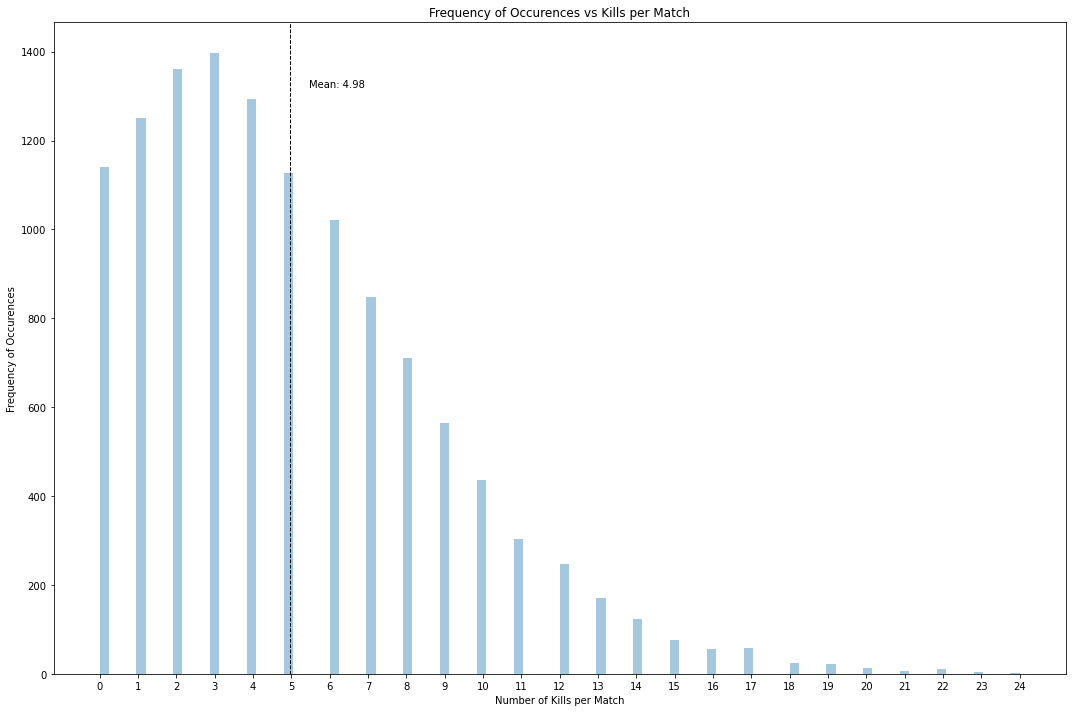

In [81]:
# plot Frequency of Occurences vs Kills per Match
plt.figure(figsize=(15,10))
ax = sns.distplot(match_clean_df7['stats.kills'], kde=False, bins=100)
plt.axvline(match_clean_df7['stats.kills'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(match_clean_df7['stats.kills'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(match_clean_df7['stats.kills'].mean()))
plt.xlabel('Number of Kills per Match')
plt.ylabel('Frequency of Occurences')
plt.title('Frequency of Occurences vs Kills per Match')
plt.xticks(np.arange(0, 25, step=1))
plt.tight_layout()  # makes sure there is no overlap in plots
plt.show()

The graph above show the frequency of occurences for number of kills per game. We can clearly see that this graph is right skewed, with 3 kills being the highest frequency. The average frequency is ~5 kills per game, which seems reasonable to me.

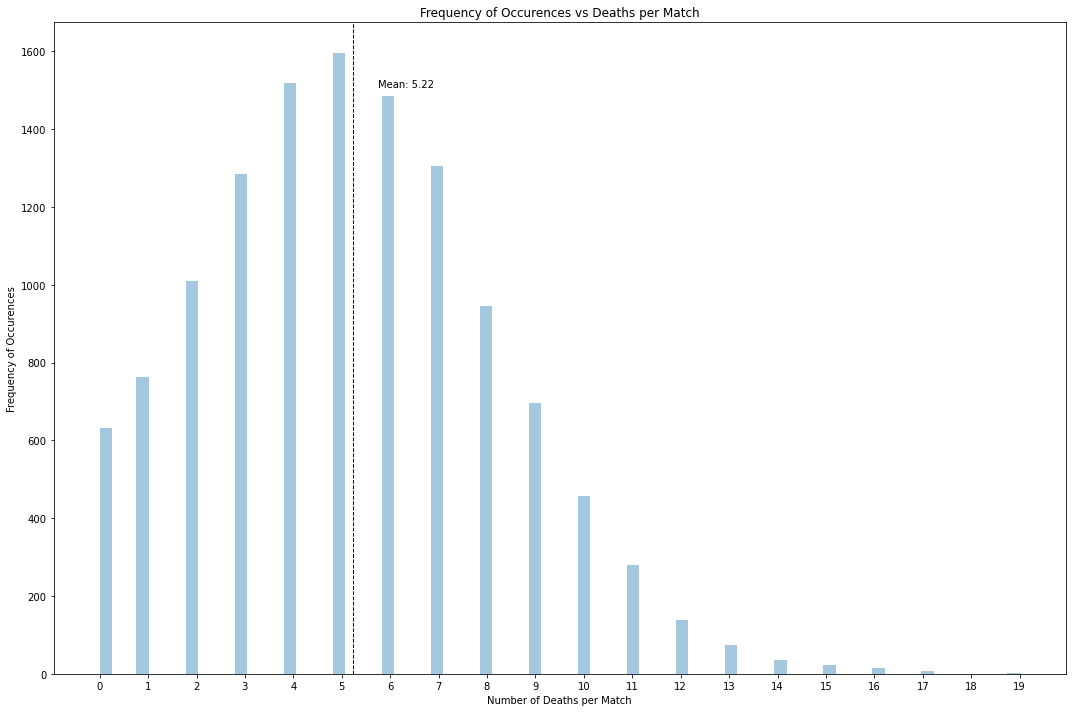

In [82]:
# plot Frequency of Occurences vs Deaths per Match
plt.figure(figsize=(15,10))
ax = sns.distplot(match_clean_df7['stats.deaths'],kde=False, bins=75)
plt.axvline(match_clean_df7['stats.deaths'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(match_clean_df7['stats.deaths'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(match_clean_df7['stats.deaths'].mean()))
plt.xlabel('Number of Deaths per Match')
plt.ylabel('Frequency of Occurences')
plt.title('Frequency of Occurences vs Deaths per Match')
plt.xticks(np.arange(0, 20, step=1))
plt.tight_layout()  # makes sure there is no overlap in plots
plt.show()

The graph above show the frequency of occurences for number of deaths per game. We can clearly see that this graph is also right skewed, but not as much as the previous graph. The highest frequency of deaths is 5 and the average is also ~5. This suggests that the average Nasus player is dying as much as he is eliminating other champions.

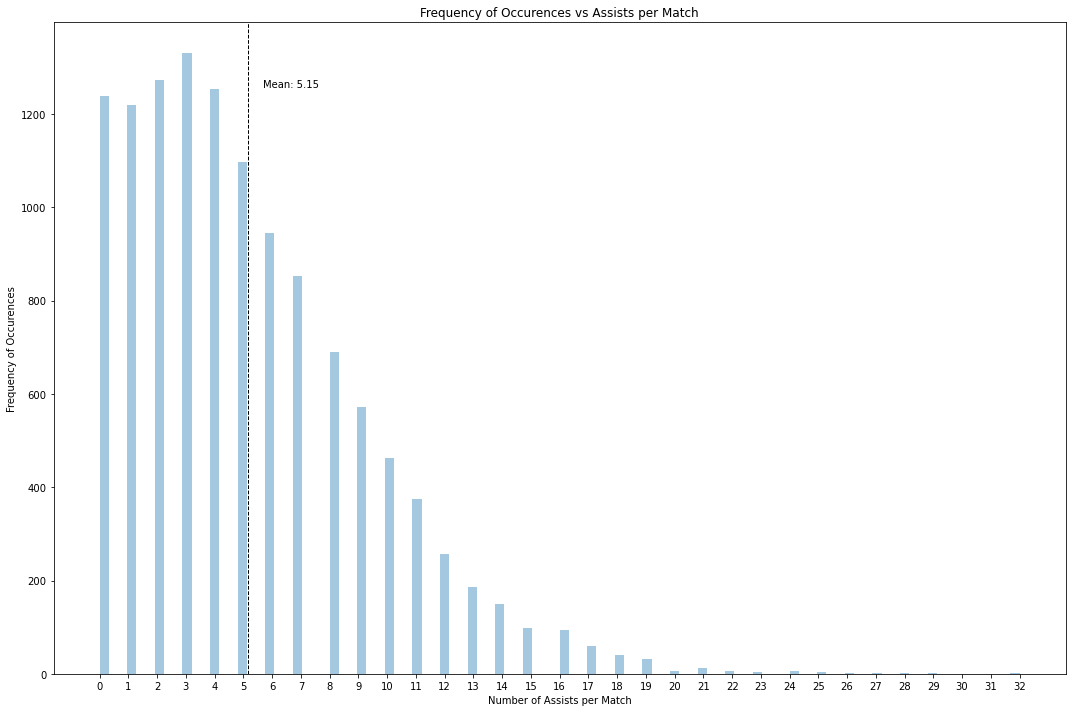

In [83]:
# plot Frequency of Occurences vs Assists per Match
plt.figure(figsize=(15,10))
ax = sns.distplot(match_clean_df7['stats.assists'],kde=False, bins=100)
plt.axvline(match_clean_df7['stats.assists'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(match_clean_df7['stats.assists'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(match_clean_df7['stats.assists'].mean()))
plt.xlabel('Number of Assists per Match')
plt.ylabel('Frequency of Occurences')
plt.title('Frequency of Occurences vs Assists per Match')
plt.xticks(np.arange(0, 33, step=1))
plt.tight_layout()  # makes sure there is no overlap in plots
plt.show()

The graph above show the frequency of occurences for number of assists per game. This graph is heavily right skewed. The highest frequency of assists is 4 and the average is  ~5. This suggests could suggest that the average Nasus player doesn't engage in team fights as often as other players. This could also be dependent on match length, as shorter game may only have less team fights and less opportunities to get assists.

Lets look at the average match game length:

In [84]:
# Average Match game length
match_clean_df7['gameDuration'].describe()/60

count    204.433333
mean      28.264120
std        7.762753
min        3.183333
25%       23.833333
50%       28.433333
75%       33.050000
max       60.083333
Name: gameDuration, dtype: float64

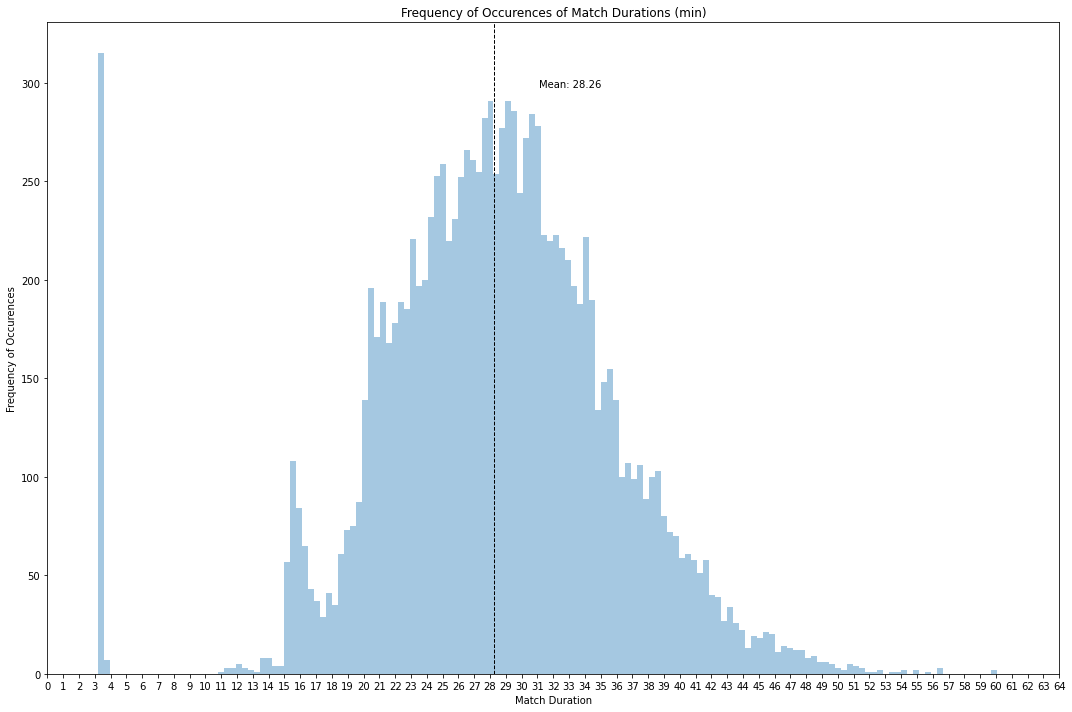

In [85]:
# plot Frequency of Occurences of Match Durations
plt.figure(figsize=(15,10))
ax = sns.distplot(match_clean_df7['gameDuration']/60,kde=False, bins=150)
plt.axvline(match_clean_df7['gameDuration'].mean()/60, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(match_clean_df7['gameDuration'].mean()/60*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(match_clean_df7['gameDuration'].mean()/60))
plt.xlabel('Match Duration')
plt.ylabel('Frequency of Occurences')
plt.title('Frequency of Occurences of Match Durations (min)')
plt.xticks(np.arange(0, 65, step=1))
plt.tight_layout()  # makes sure there is no overlap in plots
plt.show()

From the graph above, there seems to be matches that end at 3 or 4 min. This isnt possible, and is most likely due to the game server being shut down. We will have to remove all rows associated with games being shorter than 5 min.

In [86]:
# Find indexes to drop
indexNames = match_clean_df7[match_clean_df7['gameDuration'] < 300 ].index

In [87]:
# Drop indexes
match_clean_df8 = match_clean_df7.drop(indexNames)

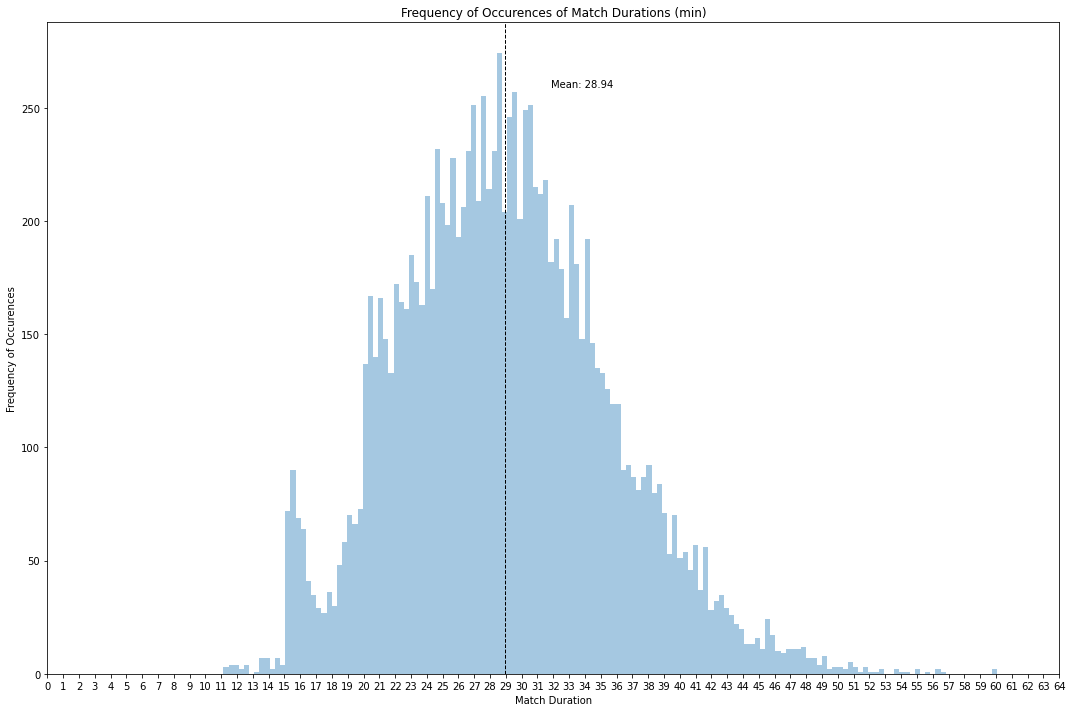

In [88]:
# Check
# plot Frequency of Occurences of Match Durations
plt.figure(figsize=(15,10))
ax = sns.distplot(match_clean_df8['gameDuration']/60,kde=False, bins=150)
plt.axvline(match_clean_df8['gameDuration'].mean()/60, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(match_clean_df8['gameDuration'].mean()/60*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(match_clean_df8['gameDuration'].mean()/60))
plt.xlabel('Match Duration')
plt.ylabel('Frequency of Occurences')
plt.title('Frequency of Occurences of Match Durations (min)')
plt.xticks(np.arange(0, 65, step=1))
plt.tight_layout()  # makes sure there is no overlap in plots
plt.show()

In [89]:
# Review the dataframe
print(match_clean_df8.shape)
match_clean_df8.head()

(11944, 230)


,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass
0,0,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,5879,4953,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,

### Stats.Damage columns

These columns represent the damage type and amount done in the match by the player. There are also damage columns that represent the total amount of damage by damage type done to enemy champions. These columns can be represented as fractions of the totals columns to be better represented in the model. I will convert the damage done to champion columns as fractions or their total damage types. Once converted, I can drop the raw damage done to champions. 


In [90]:
# Create fraction of magic damage done to champions
match_clean_df8['Fraction Magic Damage Delt to Champions'] = match_clean_df8['stats.magicDamageDealtToChampions']/match_clean_df8['stats.magicDamageDealt']
# Create fraction of Physical damage done to champions
match_clean_df8['Fraction Physical Damage Delt to Champions'] = match_clean_df8['stats.physicalDamageDealtToChampions']/match_clean_df8['stats.physicalDamageDealt']
# Create fraction of true damage done to champions
match_clean_df8['Fraction True Damage Delt to Champions'] = match_clean_df8['stats.trueDamageDealtToChampions']/match_clean_df8['stats.trueDamageDealt']

In [91]:
# Check
match_clean_df8[['Fraction Magic Damage Delt to Champions', 'stats.magicDamageDealtToChampions', 'stats.magicDamageDealt']].head()

,Fraction Magic Damage Delt to Champions,stats.magicDamageDealtToChampions,stats.magicDamageDealt
0,0.096755,5879,60762
1,0.142722,6344,44450
2,0.117861,6622,56185
3,0.150959,6790,44979
4,0.095657,1936,20239


In [92]:
# Drop raw damage dealt to champion columns
match_clean_df9 = match_clean_df8.drop(['stats.magicDamageDealtToChampions', 'stats.physicalDamageDealtToChampions', 'stats.trueDamageDealtToChampions'], axis=1)

print(match_clean_df9.shape)
match_clean_df9.head()

(11944, 230)


,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass,Fraction Magic Damage Delt to Champions,Fraction Physical Damage Delt to Champions,Fraction True Damage Delt to Champions
0,0,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,0,0,14380,10990,6478,20,7,22286,8334,7598,2,0,185,3,1,0

### stats.damageDealtToObjectives and stats.damageDealtToTurrets

These columns are related to eachother as turret are considered objectives. We will convert the stats.damageDealtToTurrets column as a fraction of the stats.damageDealtToObjectives column then remove the raw damage dealt to turrent column

In [93]:
# Create fractional column
match_clean_df9['Fraction of damage dealt to turrets'] = match_clean_df9['stats.damageDealtToTurrets']/match_clean_df9['stats.damageDealtToObjectives']

# Drop damage dealt to turrets column
match_clean_df10 = match_clean_df9.drop('stats.damageDealtToTurrets', axis=1)

### Stat.perk Columns

These columns represent the rune perk codes for the perks that the player had selected. We need to convert the each perk code to the name of the rune, put them in a list, then use the multilabel binarizer to get dummies. Stats.perkPrimarystyle and stats.perkSubStyle are not needed as rune choices depend upon what the primary and secondary style that the player had selected. 

For the Stat.statPerk, these are other rune codes, which need to be converted to their string equivalents, then out into a list and then binarized. This cannot be accomplished however as the rune codes do not exist the developer files. So we will get rid of these columns.

It is possible to get the rune codes names using the developer runesReforged.json fil.

In [94]:
# Import runesReforged.json file
with open('runesReforged.json') as f:
    rune_data = json.load(f)

In [95]:
# Check whats in the json file
rune_data[0]

{'id': 8100,
 'key': 'Domination',
 'icon': 'perk-images/Styles/7200_Domination.png',
 'name': 'Domination',
 'slots': [{'runes': [{'id': 8112,
     'key': 'Electrocute',
     'icon': 'perk-images/Styles/Domination/Electrocute/Electrocute.png',
     'name': 'Electrocute',
     'shortDesc': "Hitting a champion with 3 <b>separate</b> attacks or abilities in 3s deals bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'>adaptive damage</lol-uikit-tooltipped-keyword>.",
     'longDesc': "Hitting a champion with 3 <b>separate</b> attacks or abilities within 3s deals bonus <lol-uikit-tooltipped-keyword key='LinkTooltip_Description_AdaptiveDmg'><font color='#48C4B7'>adaptive damage</font></lol-uikit-tooltipped-keyword>.<br><br>Damage: 30 - 180 (+0.4 bonus AD, +0.25 AP) damage.<br><br>Cooldown: 25 - 20s<br><br><hr><i>'We called them the Thunderlords, for to speak of their lightning was to invite disaster.'</i>"},
    {'id': 8124,
     'key': 'Predator',
     'icon': 'pe

In [96]:
# Figure out how to get the rune codes
rune_data[1]['slots'][0]['runes'][0]['id']

8351

In [97]:
# Figure out how to get the rune names
rune_data[0]['slots'][2]['runes'][1]['key']

'GhostPoro'

In [98]:
# Create a key dictionary for runes
rune_key_dictionary = {}
for key1 in range(0,len(rune_data)):
    for key2 in range(0,len(rune_data[key1]['slots'])):
        for key3 in range(0,len(rune_data[key1]['slots'][key2]['runes'])):
            rune_key_dictionary.update({rune_data[key1]['slots'][key2]['runes'][key3]['id']:rune_data[key1]['slots'][key2]['runes'][key3]['key']})

In [99]:
# Check the dictionary
print(len(rune_key_dictionary))
rune_key_dictionary

63


{8112: 'Electrocute',
 8124: 'Predator',
 8128: 'DarkHarvest',
 9923: 'HailOfBlades',
 8126: 'CheapShot',
 8139: 'TasteOfBlood',
 8143: 'SuddenImpact',
 8136: 'ZombieWard',
 8120: 'GhostPoro',
 8138: 'EyeballCollection',
 8135: 'RavenousHunter',
 8134: 'IngeniousHunter',
 8105: 'RelentlessHunter',
 8106: 'UltimateHunter',
 8351: 'GlacialAugment',
 8360: 'UnsealedSpellbook',
 8358: 'MasterKey',
 8306: 'HextechFlashtraption',
 8304: 'MagicalFootwear',
 8313: 'PerfectTiming',
 8321: 'FuturesMarket',
 8316: 'MinionDematerializer',
 8345: 'BiscuitDelivery',
 8347: 'CosmicInsight',
 8410: 'ApproachVelocity',
 8352: 'TimeWarpTonic',
 8005: 'PressTheAttack',
 8008: 'LethalTempo',
 8021: 'FleetFootwork',
 8010: 'Conqueror',
 9101: 'Overheal',
 9111: 'Triumph',
 8009: 'PresenceOfMind',
 9104: 'LegendAlacrity',
 9105: 'LegendTenacity',
 9103: 'LegendBloodline',
 8014: 'CoupDeGrace',
 8017: 'CutDown',
 8299: 'LastStand',
 8437: 'GraspOfTheUndying',
 8439: 'Aftershock',
 8465: 'Guardian',
 8446: 'D

In [100]:
# Check data type of the stats.perk row
match_clean_df10['stats.perk5'].dtype

dtype('int64')

In [101]:
# map the names using the dictionary
match_clean_df11 = match_clean_df10.replace({"stats.perk0": rune_key_dictionary, "stats.perk1": rune_key_dictionary, 
                                           "stats.perk2": rune_key_dictionary, "stats.perk3": rune_key_dictionary, 
                                           "stats.perk4": rune_key_dictionary, "stats.perk5": rune_key_dictionary})

In [102]:
# Check
match_clean_df11.head()

,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass,Fraction Magic Damage Delt to Champions,Fraction Physical Damage Delt to Champions,Fraction True Damage Delt to Champions,Fraction of damage dealt to turrets
0,0,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,0,0,14380,10990,20,7,22286,8334,7598,2,0,185,3

In [103]:
# Drop stats.perkPrimaryStyle	stats.perkSubStyle	stats.statPerk0	stats.statPerk1	stats.statPerk2 columns
match_clean_df12 = match_clean_df11.drop(['stats.perkPrimaryStyle', 'stats.perkSubStyle', 'stats.statPerk0', 'stats.statPerk1', 'stats.statPerk2'], axis=1)

# Check
match_clean_df12.head()

,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass,Fraction Magic Damage Delt to Champions,Fraction Physical Damage Delt to Champions,Fraction True Damage Delt to Champions,Fraction of damage dealt to turrets
0,0,1,5,1,0,1,0,405,0,0,0,0,60762,58411,2331,0,0,0,14380,10990,20,7,22286,8334,7598,2,0,185,3,1,0,57,4,10,1,False,False,False,False,False,False,SummonAery,ManaflowBand,Transcendence,G

In [104]:
match_clean_df12[['stats.perk1']].dtypes

stats.perk1    object
dtype: object

In [105]:
# Combine runes into a list column
match_clean_df12['Rune List'] = match_clean_df12[['stats.perk0', 'stats.perk1', 'stats.perk2', 'stats.perk3', 'stats.perk4', 'stats.perk5']].values.tolist()

# See the value counts of distinct rune compositions
match_clean_df12['Rune List'].value_counts()

[GraspOfTheUndying, Demolish, Conditioning, Overgrowth, MagicalFootwear, CosmicInsight]                     2089
[UnsealedSpellbook, MagicalFootwear, BiscuitDelivery, CosmicInsight, NimbusCloak, Transcendence]             628
[GraspOfTheUndying, Demolish, SecondWind, Overgrowth, BiscuitDelivery, CosmicInsight]                        457
[GraspOfTheUndying, Demolish, Conditioning, Overgrowth, CosmicInsight, MagicalFootwear]                      272
[GraspOfTheUndying, Demolish, Conditioning, Overgrowth, BiscuitDelivery, CosmicInsight]                      240
[GraspOfTheUndying, Demolish, SecondWind, Overgrowth, NullifyingOrb, Scorch]                                 228
[GraspOfTheUndying, Demolish, BonePlating, Overgrowth, MagicalFootwear, CosmicInsight]                       190
[GraspOfTheUndying, Demolish, SecondWind, Overgrowth, MagicalFootwear, CosmicInsight]                        139
[GraspOfTheUndying, Demolish, BonePlating, Overgrowth, BiscuitDelivery, CosmicInsight]          

The mapping did not work out completely. There seems to be an unmapped rune who's number is 8359. For now we will conver the the stat.perk columns to strings and then redo the rune list. We can remove this feature once it has been binarized.

In [106]:
# Convert to string
match_clean_df12[['stats.perk0', 'stats.perk1', 'stats.perk2', 'stats.perk3', 'stats.perk4', 'stats.perk5']] = match_clean_df12[['stats.perk0', 'stats.perk1', 'stats.perk2', 'stats.perk3', 'stats.perk4', 'stats.perk5']].astype(str)

In [107]:
# Redo mapping
# Combine runes into a list column
match_clean_df12['Rune List'] = match_clean_df12[['stats.perk0', 'stats.perk1', 'stats.perk2', 'stats.perk3', 'stats.perk4', 'stats.perk5']].values.tolist()

# See the value counts of distinct rune compositions
match_clean_df12['Rune List'].value_counts()

[GraspOfTheUndying, Demolish, Conditioning, Overgrowth, MagicalFootwear, CosmicInsight]                     2089
[UnsealedSpellbook, MagicalFootwear, BiscuitDelivery, CosmicInsight, NimbusCloak, Transcendence]             628
[GraspOfTheUndying, Demolish, SecondWind, Overgrowth, BiscuitDelivery, CosmicInsight]                        457
[GraspOfTheUndying, Demolish, Conditioning, Overgrowth, CosmicInsight, MagicalFootwear]                      272
[GraspOfTheUndying, Demolish, Conditioning, Overgrowth, BiscuitDelivery, CosmicInsight]                      240
[GraspOfTheUndying, Demolish, SecondWind, Overgrowth, NullifyingOrb, Scorch]                                 228
[GraspOfTheUndying, Demolish, BonePlating, Overgrowth, MagicalFootwear, CosmicInsight]                       190
[GraspOfTheUndying, Demolish, SecondWind, Overgrowth, MagicalFootwear, CosmicInsight]                        139
[GraspOfTheUndying, Demolish, BonePlating, Overgrowth, BiscuitDelivery, CosmicInsight]          

In [108]:
# Use the Multilabel binerizer to binerize the rune lsit column

# Instantiate
mlb = MultiLabelBinarizer(sparse_output=True)

# Binarizes the 'Item List' column and joins it to the original dataframe, while also dropping the original column
match_clean_df12 = match_clean_df12.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(match_clean_df12.pop('Rune List')),
                index=match_clean_df12.index,
                columns=mlb.classes_))

In [109]:
# Check columns
print(match_clean_df12.shape)
match_clean_df12.head()

(11944, 288)


,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.perk0,stats.perk1,stats.perk2,stats.perk3,stats.perk4,stats.perk5,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass,Fraction Magic Damage Delt to Champions,Fraction Physical Damage Delt to Champions,Fraction True Damage Delt to Champions,Fraction of damage dealt to turrets,8359,AbsoluteFocus,ApproachVelocity,ArcaneComet,BiscuitDelivery,BonePlating,Celerity,CheapShot,Conditioning,Conqueror,CosmicInsight,CoupDeGrace,CutDown,DarkHarvest,Demolish,Electrocut

In [110]:
# Find rows with 8359 and remove them from analysis (this rune was removed at the begining of season 13)
indexNames = match_clean_df12[match_clean_df12['8359'] == 1].index

In [111]:
# Drop indexes
match_clean_df13 = match_clean_df12.drop(indexNames)

In [112]:
# Drop column 8359, and the stat.perk columns
match_clean_df14 = match_clean_df13.drop(['stats.perk0', 'stats.perk1', 'stats.perk2', 'stats.perk3', 'stats.perk4', 'stats.perk5', '8359'], axis=1)

In [113]:
# Check
print(match_clean_df14.shape)
match_clean_df14.head()

(11818, 281)


,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass,Fraction Magic Damage Delt to Champions,Fraction Physical Damage Delt to Champions,Fraction True Damage Delt to Champions,Fraction of damage dealt to turrets,AbsoluteFocus,ApproachVelocity,ArcaneComet,BiscuitDelivery,BonePlating,Celerity,CheapShot,Conditioning,Conqueror,CosmicInsight,CoupDeGrace,CutDown,DarkHarvest,Demolish,Electrocute,EyeballCollection,FleetFootwork,FontOfLife,FuturesMarket,GatheringStorm,Gho

### Boolean Columns: stats.firstBloodKill, stats.firstBloodAssist, stats.firstTowerKill, stats.firstTowerAssist, stats.firstInhibitorKill and stats.firstInhibitorAssist

These columns need to be converted into 0's and 1's.

In [114]:
#check dtype
match_clean_df14[['stats.firstBloodKill', 'stats.firstBloodAssist', 'stats.firstTowerKill', 
                 'stats.firstTowerAssist', 'stats.firstInhibitorKill', 'stats.firstInhibitorAssist']] = match_clean_df14[['stats.firstBloodKill', 'stats.firstBloodAssist', 'stats.firstTowerKill', 
                 'stats.firstTowerAssist', 'stats.firstInhibitorKill', 'stats.firstInhibitorAssist']].astype(int)

In [115]:
match_clean_df14.head()

,stats.win,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.visionWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,gameDuration,Banned Champion Id,Cleanse,Exhaust,Flash,Ghost,Heal,Ignite,Smite,Teleport,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,B. F. Sword,Bami's Cinder,Banshee's Veil,Berserker's Greaves,Bilgewater Cutlass,Black Cleaver,Blade of the Ruined King,Blasting Wand,Bloodthirster,Boots of Mobility,Boots of Speed,Boots of Swiftness,Bramble Vest,Broken Stopwatch,Bulwark of the Mountain,Catalyst of Aeons,Caulfield's Warhammer,Chain Vest,Cloak of Agility,Cloth Armor,Commencing Stopwatch,Control Ward,Corrupting Potion,Crystalline Bracer,Cull,Dagger,Dark Seal,Dead Man's Plate,Death's Dance,Doran's Blade,Doran's Ring,Doran's Shield,Duskblade of Draktharr,Edge of Night,Elixir of Iron,Elixir of Wrath,Enchantment: Bloodrazor,Enchantment: Cinderhulk,Enchantment: Runic Echoes,Enchantment: Warrior,Essence Reaver,Executioner's Calling,Eye of the Herald,Faerie Charm,Farsight Alteration,Fiendish Codex,Forbidden Idol,Frostfang,Frozen Fist,Frozen Heart,Frozen Mallet,Gargoyle Stoneplate,Giant's Belt,Glacial Shroud,Guardian Angel,Guinsoo's Rageblade,Haunting Guise,Health Potion,Hexdrinker,Hextech GLP-800,Hextech Gunblade,Hextech Protobelt-01,Hextech Revolver,Hunter's Machete,Hunter's Talisman,Iceborn Gauntlet,Infinity Edge,Ionian Boots of Lucidity,Jaurim's Fist,Kindlegem,Kircheis Shard,Knight's Vow,Last Whisper,Liandry's Torment,Lich Bane,Locket of the Iron Solari,Long Sword,Lord Dominik's Regards,Lost Chapter,Luden's Echo,Luden's Pulse,Manamune,Maw of Malmortius,Mejai's Soulstealer,Mercurial Scimitar,Mercury's Treads,Minion Dematerializer,Morellonomicon,Mortal Reminder,Muramana,Nashor's Tooth,Needlessly Large Rod,Negatron Cloak,Ninja Tabi,Null-Magic Mantle,Oblivion Orb,Oracle Lens,Pauldrons of Whiterock,Perfectly Timed Stopwatch,Phage,Phantom Dancer,Pickaxe,Quicksilver Sash,Rabadon's Deathcap,Randuin's Omen,Rapid Firecannon,Ravenous Hydra,Recurve Bow,Redemption,Refillable Potion,Rejuvenation Bead,Righteous Glory,Rod of Ages,Ruby Crystal,Runesteel Spaulders,Rylai's Crystal Scepter,Sanguine Blade,Sapphire Crystal,Seeker's Armguard,Seraph's Embrace,Serrated Dirk,Shard of True Ice,Sheen,Shurelya's Reverie,Skirmisher's Sabre,Slightly Magical Boots,Sorcerer's Shoes,Spear of Shojin,Spectre's Cowl,Spellbinder,Spirit Visage,Stalker's Blade,Statikk Shiv,Sterak's Gage,Stinger,Stopwatch,Stormrazor,Sunfire Cape,Tear of the Goddess,Thornmail,Tiamat,Titanic Hydra,Total Biscuit of Everlasting Will,Trinity Force,Trinity Fusion,Twin Shadows,Vampiric Scepter,Void Staff,Warden's Mail,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass,Fraction Magic Damage Delt to Champions,Fraction Physical Damage Delt to Champions,Fraction True Damage Delt to Champions,Fraction of damage dealt to turrets,AbsoluteFocus,ApproachVelocity,ArcaneComet,BiscuitDelivery,BonePlating,Celerity,CheapShot,Conditioning,Conqueror,CosmicInsight,CoupDeGrace,CutDown,DarkHarvest,Demolish,Electrocute,EyeballCollection,FleetFootwork,FontOfLife,FuturesMarket,GatheringStorm,Gho

### Banned Champion ID Column

This column shows the champion id code that the nasus play had banned. This column will need to be dumified with the proper champion names. Due to time constraints, I will just drop this column, but we can see which champion ID was the most banned by Nasus players

In [117]:
# Check top ten banned champion ids
match_clean_df14['Banned Champion Id'].value_counts()[0:10]

122    724
157    634
11     525
53     417
25     404
238    386
555    307
24     243
17     239
82     224
Name: Banned Champion Id, dtype: int64

Using the LoL Datadragon folder, the top 10 most banned champions by Nasus players in this dataset are:

1. Darius
2. Yasuo
3. Master Yi
4. Blitzcrank
5. Morgana
6. Zed
7. Pyke
8. Jax
9. Teemo
10. Mordekaiser

This differs from  the top 10 most banned champions, as of September 11, according to op.gg (https://na.op.gg/champion/statistics):

1. Yone
2. Caitlyn
3. Akali
4. Zed
5. Darius
6. Morgana
7. Yasuo
8. Blitzcrank
9. Elise
10. Ekko

This could indicate that Nasus players ban different champions than other players, perhaps they ban characters who counter their game play. Howeer, this will not be captured the model.

In [118]:
match_clean_df15 = match_clean_df14.drop('Banned Champion Id', axis=1)

### Final Check!

In [119]:
match_clean_df15.isna().sum()

stats.win                                        0.0
stats.kills                                      0.0
stats.deaths                                     0.0
stats.assists                                    0.0
stats.largestKillingSpree                        0.0
stats.largestMultiKill                           0.0
stats.killingSprees                              0.0
stats.longestTimeSpentLiving                     0.0
stats.doubleKills                                0.0
stats.tripleKills                                0.0
stats.quadraKills                                0.0
stats.pentaKills                                 0.0
stats.magicDamageDealt                           0.0
stats.physicalDamageDealt                        0.0
stats.trueDamageDealt                            0.0
stats.largestCriticalStrike                      0.0
stats.totalHeal                                  0.0
stats.totalUnitsHealed                           0.0
stats.damageSelfMitigated                     

There are NaNs in the following calculated columns:

- Fraction Magic Damage Delt to Champions
- Fraction Physical Damage Delt to Champions     
- Fraction True Damage Delt to Champions
- Fraction of damage dealt to turrets

This is due to a number over 0 error. I am going to replace these NaNs with 0 as they did not do any damage of that damage type at all.

Also we forgot to get rid of the gold spent column. WE can get rid of this column as it is a function of the gold earned column

In [123]:
match_clean_df16 = match_clean_df15.fillna(0).drop('stats.goldSpent', axis=1)

In [124]:
# Check
match_clean_df16.isna().sum()

stats.win                                     0.0
stats.kills                                   0.0
stats.deaths                                  0.0
stats.assists                                 0.0
stats.largestKillingSpree                     0.0
stats.largestMultiKill                        0.0
stats.killingSprees                           0.0
stats.longestTimeSpentLiving                  0.0
stats.doubleKills                             0.0
stats.tripleKills                             0.0
stats.quadraKills                             0.0
stats.pentaKills                              0.0
stats.magicDamageDealt                        0.0
stats.physicalDamageDealt                     0.0
stats.trueDamageDealt                         0.0
stats.largestCriticalStrike                   0.0
stats.totalHeal                               0.0
stats.totalUnitsHealed                        0.0
stats.damageSelfMitigated                     0.0
stats.damageDealtToObjectives                 0.0


In [125]:
# Final match data output
# Output to csv
match_clean_df16.to_csv('MatchDataClean_complete.csv', index_label=False)

The data is now ready to be put into a model!